In [1]:
import pandas as pd
from simhash import Simhash, SimhashIndex
import pandas as pd
import re
from itertools import combinations, takewhile
import collections
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
uchicago_path = './Data/uchicago_texts'
stanford_path = './Data/stanford_texts'
cornell_path = './Data/cornell_texts'
cm_path = './Data/cm_texts'
output_path = './Data'

---

### Prepare Text Data

In [3]:
keywords = ['machine learning', 
            'machinelearning',
            ' ml '
            'bigdata',
            'big data',
            'deep learning',
            'deeplearning',
            ' ai ', 
            'a.i.', 
            'artificial intelligence', 
            'artificialintelligence', 
            'data science', 
            'datascience', 
            'analytics']

In [5]:
uchicago_df_list = []
uchicago_file_list = [i for i in os.listdir(uchicago_path) if i.split('.')[-1]=='csv']
for file in uchicago_file_list:
    uchicago_df_list.append(pd.read_csv(os.path.join(uchicago_path, file), header=None, names=['tweet_id', 'text']))

uchicago_merged = pd.concat(uchicago_df_list, ignore_index=True).reset_index(drop=True).drop_duplicates()

uchicago_merged = uchicago_merged.loc[uchicago_merged.text.apply(
    lambda x: any(word in str(x).lower() for word in keywords)), :].reset_index(drop=True)
uchicago_merged['text'] = uchicago_merged.text.apply(lambda x: x.replace('\n', ' '))

print(uchicago_merged.shape)
pd.to_pickle(uchicago_merged, os.path.join(output_path, 'uchicago_texts.pkl'))

(4264, 2)


In [6]:
stanford_df_list = []
stanford_file_list = [i for i in os.listdir(stanford_path) if i.split('.')[-1]=='csv']
for file in stanford_file_list:
    stanford_df_list.append(pd.read_csv(os.path.join(stanford_path, file), header=None, names=['tweet_id', 'text']))

stanford_merged = pd.concat(stanford_df_list, ignore_index=True).reset_index(drop=True).drop_duplicates()

stanford_merged = stanford_merged.loc[stanford_merged.text.apply(
    lambda x: any(word in str(x).lower() for word in keywords)), :].reset_index(drop=True)
stanford_merged['text'] = stanford_merged.text.apply(lambda x: x.replace('\n', ' '))

print(stanford_merged.shape)
pd.to_pickle(stanford_merged, os.path.join(output_path, 'stanford_texts.pkl'))

(48713, 2)


In [7]:
cornell_df_list = []
cornell_file_list = [i for i in os.listdir(cornell_path) if i.split('.')[-1]=='csv']
for file in cornell_file_list:
    cornell_df_list.append(pd.read_csv(os.path.join(cornell_path, file), header=None, names=['tweet_id', 'text']))

cornell_merged = pd.concat(cornell_df_list, ignore_index=True).reset_index(drop=True).drop_duplicates()

cornell_merged = cornell_merged.loc[cornell_merged.text.apply(
    lambda x: any(word in str(x).lower() for word in keywords)), :].reset_index(drop=True)
cornell_merged['text'] = cornell_merged.text.apply(lambda x: x.replace('\n', ' '))

print(cornell_merged.shape)
pd.to_pickle(cornell_merged, os.path.join(output_path, 'cornell_texts.pkl'))

(2204, 2)


In [8]:
cm_df_list = []
cm_file_list = [i for i in os.listdir(cm_path) if i.split('.')[-1]=='csv']
for file in cm_file_list:
    cm_df_list.append(pd.read_csv(os.path.join(cm_path, file), header=None, names=['tweet_id', 'text']))

cm_merged = pd.concat(cm_df_list, ignore_index=True).reset_index(drop=True).drop_duplicates()

cm_merged = cm_merged.loc[cm_merged.text.apply(
    lambda x: any(word in str(x).lower() for word in keywords)), :].reset_index(drop=True)
cm_merged['text'] = cm_merged.text.apply(lambda x: x.replace('\n', ' '))

print(cm_merged.shape)
pd.to_pickle(cm_merged, os.path.join(output_path, 'cm_texts.pkl'))

(5943, 2)


***

### SimHash Analysis

In [4]:
uchicago = pd.read_pickle('C:/Users/Jon/OneDrive/School/Big Data/Project/Data/uchicago_texts.pkl')
uchicago.head()

,tweet_id,text
0,904792792899219458,buzzofinnovation excellent article about our u...
1,904839005493235712,new program teaches data science for energy an...
2,904848531818778624,rt ryanpierce_chi buzzofinnovation excellent a...
3,904848794742902785,rt ryanpierce_chi buzzofinnovation excellent a...
4,928690581747961856,uchicago business analytics uchicago business


In [5]:
stanford = pd.read_pickle('C:/Users/Jon/OneDrive/School/Big Data/Project/Data/stanford_texts.pkl')
stanford.head()

,tweet_id,text
0,891374781630734337,adobe and stanford just taught ai to edit vide...
1,897297772260536320,rt stanfordnlp free uptodate stanford deep lea...
2,897301183823364096,rt stanfordnlp free uptodate stanford deep lea...
3,897303778977644544,rt stanfordnlp free uptodate stanford deep lea...
4,897305300683939840,rt stanfordnlp free uptodate stanford deep lea...


In [6]:
cornell = pd.read_pickle('C:/Users/Jon/OneDrive/School/Big Data/Project/Data/cornell_texts.pkl')
cornell.head()

,tweet_id,text
0,966711727118278656,weny_nickq special report on artificial intell...
1,967434346134233088,rt aganalytics check out our new crop insuranc...
2,968631962737897473,rt aganalytics john deere operations center co...
3,968889392692678657,rt aganalytics john deere operations center co...
4,968952247655780357,rt aganalytics john deere operations center co...


In [7]:
cm = pd.read_pickle('C:/Users/Jon/OneDrive/School/Big Data/Project/Data/cm_texts.pkl')
cm.head()

,tweet_id,text
0,898931181063766016,carnegiemellon cmuhcii facebook georgiatech ha...
1,904730811878047746,a sensor that could soon makes homes scarysmar...
2,904779217048612864,a sensor that could soon makes homes scarysmar...
3,933139992787828738,carnegie mellon university launches ai researc...
4,933140007728005121,carnegie mellon university launches ai researc...


In [13]:
uchicago = uchicago.text.to_dict()
stanford = stanford.text.to_dict()
cornell = cornell.text.to_dict()
cm = cm.text.to_dict()

**The width parameter will be set to 64 to ensure unique fingerprints according to the SimHash authors, despite it an unnecessarily large hash for this application**

In [14]:
def get_features(s):
    width = 64
    s = s.lower()
    s = re.sub(r'[^\w]+', '', s)
    return [s[i:i + width] for i in range(max(len(s) - width + 1, 1))]

In [15]:
uchi_objs = [(str(k), Simhash(get_features(v))) for k, v in uchicago.items()]
stanford_objs = [(str(k), Simhash(get_features(v))) for k, v in stanford.items()]
cornell_objs = [(str(k), Simhash(get_features(v))) for k, v in cornell.items()]
cm_objs = [(str(k), Simhash(get_features(v))) for k, v in cm.items()]

In [16]:
for i in range(11):
    bucket_size = {}
    bucket_size['uchi'] = SimhashIndex(uchi_objs, k=i).bucket_size()
    bucket_size['stanford'] = SimhashIndex(stanford_objs, k=i).bucket_size()
    bucket_size['cornell'] = SimhashIndex(cornell_objs, k=i).bucket_size()
    bucket_size['cm'] = SimhashIndex(cm_objs, k=i).bucket_size()
    print(f'Bucket size (k={i})', bucket_size)

Bucket size (k=0) {'uchi': 2466, 'stanford': 18032, 'cornell': 1048, 'cm': 2623}
Bucket size (k=1) {'uchi': 4926, 'stanford': 35957, 'cornell': 2091, 'cm': 5229}
Bucket size (k=2) {'uchi': 7368, 'stanford': 53341, 'cornell': 3121, 'cm': 7787}
Bucket size (k=3) {'uchi': 9605, 'stanford': 61543, 'cornell': 4084, 'cm': 10064}
Bucket size (k=4) {'uchi': 9703, 'stanford': 31540, 'cornell': 4571, 'cm': 9982}
Bucket size (k=5) {'uchi': 6885, 'stanford': 15717, 'cornell': 4125, 'cm': 7017}
Bucket size (k=6) {'uchi': 3963, 'stanford': 4096, 'cornell': 3222, 'cm': 3970}
Bucket size (k=7) {'uchi': 2047, 'stanford': 2048, 'cornell': 1996, 'cm': 2048}
Bucket size (k=8) {'uchi': 1280, 'stanford': 1280, 'cornell': 1272, 'cm': 1280}
Bucket size (k=9) {'uchi': 1502, 'stanford': 1600, 'cornell': 1198, 'cm': 1510}
Bucket size (k=10) {'uchi': 2578, 'stanford': 10917, 'cornell': 1310, 'cm': 2667}


**Analyze duplicate tweets for different *k* thresholds**

In [17]:
uchi_dups = {}
stanford_dups = {}
cornell_dups = {}
cm_dups = {}

for k in range(1,11):
    uchi_index = SimhashIndex(uchi_objs, k=k)
    stanford_index = SimhashIndex(stanford_objs, k=k)
    cornell_index = SimhashIndex(cornell_objs, k=k)
    cm_index = SimhashIndex(cm_objs, k=k)
    
    uchi_keys = uchi_index.bucket.keys()
    uniques = 0
    dups = 0
    for key in uchi_keys:
        uchi_values = uchi_index.bucket[key]
        if len(uchi_values)>1:
            dups+=1
        else:
            uniques+=1
    uchi_dups[k] = [dups, uniques, (dups/(dups+uniques))]

    
    stanford_keys = stanford_index.bucket.keys()
    uniques = 0
    dups = 0
    for key in stanford_keys:
        stanford_values = stanford_index.bucket[key]
        if len(stanford_values)>1:
            dups+=1 #len(stanford_values)
        else:
            uniques+=1
    stanford_dups[k] = [dups, uniques, (dups/(dups+uniques))]
    

    cornell_keys = cornell_index.bucket.keys()
    uniques = 0
    dups = 0
    for key in cornell_keys:
        cornell_values = cornell_index.bucket[key]
        if len(cornell_values)>1:
            dups+=1
        else:
            uniques+=1
    cornell_dups[k] = [dups, uniques, (dups/(dups+uniques))]
    

    cm_keys = cm_index.bucket.keys()
    uniques = 0
    dups = 0
    for key in cm_keys:
        cm_values = cm_index.bucket[key]
        if len(cm_values)>1:
            dups+=1
        else:
            uniques+=1
    cm_dups[k] = [dups, uniques, (dups/(dups+uniques))]

In [18]:
uchi_dups

{1: [942, 3984, 0.19123020706455543],
 2: [1422, 5946, 0.19299674267100977],
 3: [2027, 7578, 0.2110359187922957],
 4: [3562, 6141, 0.3671029578480882],
 5: [4253, 2632, 0.6177196804647785],
 6: [3637, 326, 0.917739086550593],
 7: [2042, 5, 0.9975574010747436],
 8: [1280, 0, 1.0],
 9: [1295, 207, 0.8621837549933422],
 10: [897, 1681, 0.34794414274631497]}

In [19]:
stanford_dups

{1: [6899, 29058, 0.1918680646327558],
 2: [10546, 42795, 0.19770907931984777],
 3: [18803, 42740, 0.3055262174414637],
 4: [19804, 11736, 0.6279010779961953],
 5: [11024, 4693, 0.7014061207609594],
 6: [4096, 0, 1.0],
 7: [2048, 0, 1.0],
 8: [1280, 0, 1.0],
 9: [1600, 0, 1.0],
 10: [6224, 4693, 0.5701199963359898]}

In [20]:
cornell_dups

{1: [391, 1700, 0.18699186991869918],
 2: [588, 2533, 0.18840115347644987],
 3: [820, 3264, 0.2007835455435847],
 4: [1259, 3312, 0.2754320717567272],
 5: [1861, 2264, 0.45115151515151514],
 6: [2266, 956, 0.7032898820608318],
 7: [1861, 135, 0.9323647294589178],
 8: [1243, 29, 0.9772012578616353],
 9: [914, 284, 0.7629382303839732],
 10: [536, 774, 0.40916030534351144]}

In [21]:
cm_dups

{1: [1100, 4129, 0.21036527060623447],
 2: [1666, 6121, 0.21394632079106202],
 3: [2363, 7701, 0.23479729729729729],
 4: [3924, 6058, 0.3931075936686035],
 5: [4472, 2545, 0.6373093914778395],
 6: [3687, 283, 0.9287153652392948],
 7: [2047, 1, 0.99951171875],
 8: [1280, 0, 1.0],
 9: [1324, 186, 0.8768211920529801],
 10: [977, 1690, 0.36632920884889386]}

**Using k=3 as the author states, we can plot the different duplicate tweet ratios per school.  For reference, we can also plot additonal k thresholds**

In [22]:
sns.set_style('whitegrid')

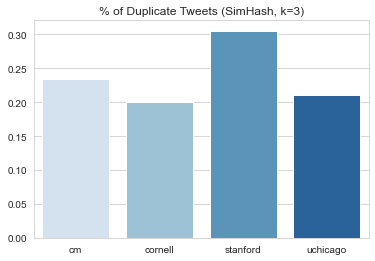

In [23]:
sns.barplot(x=['cm', 'cornell', 'stanford', 'uchicago'], 
            y = [cm_dups[3][2], cornell_dups[3][2], stanford_dups[3][2], uchi_dups[3][2]], palette='Blues')
plt.title('% of Duplicate Tweets (SimHash, k=3)');

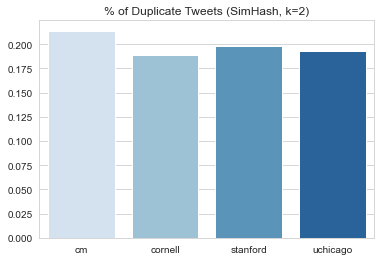

In [24]:
sns.barplot(x=['cm', 'cornell', 'stanford', 'uchicago'], 
            y = [cm_dups[2][2], cornell_dups[2][2], stanford_dups[2][2], uchi_dups[2][2]], palette='Blues')
plt.title('% of Duplicate Tweets (SimHash, k=2)');

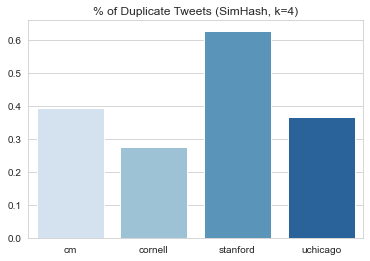

In [25]:
sns.barplot(x=['cm', 'cornell', 'stanford', 'uchicago'], 
            y = [cm_dups[4][2], cornell_dups[4][2], stanford_dups[4][2], uchi_dups[4][2]], palette='Blues')
plt.title('% of Duplicate Tweets (SimHash, k=4)');

---

## Variable Analysis

**Filter variables dataframe by tweet_id's filtered for the selected keywords**

In [ ]:
tweet_vars = pd.read_csv('tweet_variables.csv', error_bad_lines=False)

In [42]:
# Headers from each csv file were included in the hadoop merge - remove these rows

header_rows = tweet_vars.loc[(tweet_vars.tweet_id=='tweet_id'), 'tweet_id'].index
tweet_vars = tweet_vars.drop(header_rows).drop_duplicates().reset_index(drop=True)

In [43]:
print(tweet_vars.shape)
list(enumerate(tweet_vars.columns))

(3022169, 19)


[(0, 'tweet_id'),
 (1, 'tweet_dt'),
 (2, 'source'),
 (3, 'school'),
 (4, 'is_reply'),
 (5, 'favorite_count'),
 (6, 'retweet_count'),
 (7, 'user_created_at'),
 (8, 'user_favorites_count'),
 (9, 'user_followers_count'),
 (10, 'user_friends_count'),
 (11, 'user_id'),
 (12, 'user_location'),
 (13, 'user_lang'),
 (14, 'user_verified'),
 (15, 'is_quote'),
 (16, 'is_retweet'),
 (17, 'media'),
 (18, 'user_mentions')]

In [38]:
tweet_vars.head(2)

,tweet_id,tweet_dt,source,school,is_reply,favorite_count,retweet_count,user_created_at,user_favorites_count,user_followers_count,user_friends_count,user_id,user_location,user_lang,user_verified,is_quote,is_retweet,media,user_mentions
0,878029276557131776,Thu Jun 22 23:17:47 +0000 2017,"<a href=\http://twitter.com\"" rel=\""nofollow\""...",stanford,0,0,0,Thu Feb 27 04:03:06 +0000 2014,693,875,1221,2363593488,"Los Angeles, CA",en,0,0,0,0,1
1,878029303304208384,Thu Jun 22 23:17:53 +0000 2017,"<a href=\http://twitter.com\"" rel=\""nofollow\""...",stanford,0,0,0,Sat Mar 06 11:10:00 +0000 2010,5796,1047,1054,120418926,"Uppsala, Sverige",sv,0,0,1,0,1


In [53]:
# Set tweet_dt to proper datetime
tweet_vars['tweet_dt'] = tweet_vars.tweet_dt.apply(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))


# Format source
tweet_vars.loc[~tweet_vars.source.isna(), 'source'] = \
    tweet_vars.source.loc[~tweet_vars.source.isna()].apply(lambda x: str(x).split('</a>"')[-2].split('>')[-1])


# Set age of user account
tweet_vars['user_created_at'] = tweet_vars.user_created_at.apply(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))
tweet_vars['user_created_at'] = tweet_vars.user_created_at.apply(lambda x: datetime.now().date() - x.date())
tweet_vars['account_age'] = tweet_vars.user_created_at.apply(lambda x:x.days)
tweet_vars.drop('user_created_at', axis=1, inplace=True)

# Ensure following columns are int
tweet_vars['tweet_id'] = tweet_vars.tweet_id.apply(lambda x: int(x))

tweet_vars['user_favorites_count'] = tweet_vars.user_favorites_count.apply(lambda x: int(x))

tweet_vars['user_followers_count'] = tweet_vars.user_followers_count.apply(lambda x: int(x))

tweet_vars['user_friends_count'] = tweet_vars.user_friends_count.apply(lambda x: int(x))

tweet_vars['user_id'] = tweet_vars.user_id.apply(lambda x: int(x))

tweet_vars['user_verified'] = tweet_vars.user_verified.apply(lambda x: int(x))

tweet_vars['is_quote'] = tweet_vars.is_quote.apply(lambda x: int(x))

tweet_vars['is_reply'] = tweet_vars.is_reply.apply(lambda x: int(x))

tweet_vars['is_retweet'] = tweet_vars.is_retweet.apply(lambda x: int(x))

tweet_vars['media'] = tweet_vars.media.apply(lambda x: int(x))

tweet_vars['user_mentions'] = tweet_vars.user_mentions.apply(lambda x: int(x))

In [54]:
filter_ids = pd.concat([uchicago.tweet_id, stanford.tweet_id, cornell.tweet_id, cm.tweet_id], 
                       ignore_index=True).reset_index(drop=True)

In [57]:
t_vars = pd.merge(filter_ids, tweet_vars, how='left', on='tweet_id')

In [63]:
pd.to_pickle(t_vars, os.path.join(os.getcwd(), 'Data', 't_vars.pkl'))

In [299]:
tvars = pd.read_pickle(os.path.join('Data/t_vars.pkl'))

In [552]:
tvars.fillna(0, inplace=True)
tvars.head()

,tweet_id,tweet_dt,source,school,is_reply,user_favorites_count,user_followers_count,user_friends_count,user_id,user_location,user_lang,user_verified,is_quote,is_retweet,media,user_mentions,account_age,tweets_dt
0,904792792899219458,2017-09-04,Twitter Web Client,uchicago,0.0,323.0,128.0,147.0,7.225224e+17,"Chicago, IL",en,0.0,0.0,0.0,0.0,1.0,1788.0,2017-09-04
1,904839005493235712,2017-09-04,Hootsuite,uchicago,0.0,1804.0,10464.0,11267.0,2.404736e+08,0,en,0.0,0.0,0.0,0.0,1.0,3704.0,2017-09-04
2,904848531818778624,2017-09-04,Twitter for Android,uchicago,0.0,86.0,47.0,21.0,1.592287e+08,"Chicago, IL",en,0.0,0.0,1.0,0.0,1.0,3914.0,2017-09-04
3,904848794742902785,2017-09-04,Retweeter Innovation,uchicago,0.0,0.0,3671.0,3.0,8.014190e+17,"Brussels, Belgium",en,0.0,0.0,1.0,0.0,1.0,1570.0,2017-09-04
4,928690581747961856,2017-11-09,Dub.io,uchicago,0.0,12.0,1373.0,4981.0,8.600066e+17,0,en,0.0,0.0,0.0,1.0,1.0,1408.0,2017-11-09


In [14]:
tvars.describe()

,is_reply,user_favorites_count,user_followers_count,user_friends_count,user_id,user_verified,is_quote,is_retweet,media,user_mentions,account_age
count,61091.000000,61091.000000,6.109100e+04,61091.000000,6.109100e+04,61091.000000,61091.000000,61091.000000,61091.000000,61091.0,61091.000000
mean,0.048992,11824.639849,9.777055e+03,3220.197983,3.588303e+17,0.027042,0.047765,0.585307,0.021460,1.0,2575.769622
std,0.215854,39842.237392,2.161116e+05,14898.457346,4.733743e+17,0.162206,0.213270,0.492673,0.144912,0.0,1337.221659
min,0.000000,0.000000,0.000000e+00,0.000000,8.850000e+02,0.000000,0.000000,0.000000,0.000000,1.0,10.000000
25%,0.000000,111.000000,1.600000e+02,143.000000,1.953646e+08,0.000000,0.000000,0.000000,0.000000,1.0,1375.000000
50%,0.000000,1010.000000,7.310000e+02,528.000000,2.527844e+09,0.000000,0.000000,1.000000,0.000000,1.0,2482.000000
75%,0.000000,5933.500000,3.160500e+03,2029.000000,8.721446e+17,0.000000,0.000000,1.000000,0.000000,1.0,3820.000000
max,1.000000,989233.000000,4.706463e+07,790419.000000,1.366764e+18,1.000000,1.000000,1.000000,1.000000,1.0,5355.000000


In [20]:
tvars.favorite_count.unique()

array(['0', nan], dtype=object)

In [21]:
tvars.retweet_count.unique()

array(['0', nan], dtype=object)

In [301]:
tvars = tvars.drop(columns=['favorite_count', 'retweet_count'])

In [25]:
tvars.head()

,tweet_id,tweet_dt,source,school,is_reply,user_favorites_count,user_followers_count,user_friends_count,user_id,user_location,user_lang,user_verified,is_quote,is_retweet,media,user_mentions,account_age
0,904792792899219458,2017-09-04 19:46:26+00:00,Twitter Web Client,uchicago,0.0,323.0,128.0,147.0,7.225224e+17,"Chicago, IL",en,0.0,0.0,0.0,0.0,1.0,1788.0
1,904839005493235712,2017-09-04 22:50:04+00:00,Hootsuite,uchicago,0.0,1804.0,10464.0,11267.0,2.404736e+08,NaN,en,0.0,0.0,0.0,0.0,1.0,3704.0
2,904848531818778624,2017-09-04 23:27:55+00:00,Twitter for Android,uchicago,0.0,86.0,47.0,21.0,1.592287e+08,"Chicago, IL",en,0.0,0.0,1.0,0.0,1.0,3914.0
3,904848794742902785,2017-09-04 23:28:58+00:00,Retweeter Innovation,uchicago,0.0,0.0,3671.0,3.0,8.014190e+17,"Brussels, Belgium",en,0.0,0.0,1.0,0.0,1.0,1570.0
4,928690581747961856,2017-11-09 18:27:43+00:00,Dub.io,uchicago,0.0,12.0,1373.0,4981.0,8.600066e+17,NaN,en,0.0,0.0,0.0,1.0,1.0,1408.0


In [26]:
pd.Series(tvars.columns)

0                 tweet_id
1                 tweet_dt
2                   source
3                   school
4                 is_reply
5     user_favorites_count
6     user_followers_count
7       user_friends_count
8                  user_id
9            user_location
10               user_lang
11           user_verified
12                is_quote
13              is_retweet
14                   media
15           user_mentions
16             account_age
dtype: object

In [405]:
sns.set_style('whitegrid')

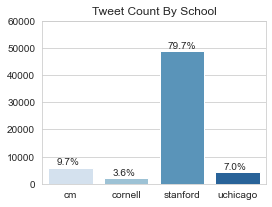

In [393]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').tweet_id.count()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+1000, ''.join([str(np.round((z[i]/(len(tvars)))*100,1)), '%']))
plt.ylim(0,60000)
plt.title('Tweet Count By School')
plt.show();

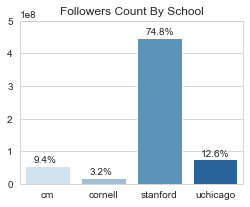

In [392]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').user_followers_count.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+1e7, ''.join([str(np.round((z[i]/tvars.user_followers_count.sum())*100,1)), '%']))
plt.ylim(0, 5e8, )
plt.title('Followers Count By School')
plt.show();

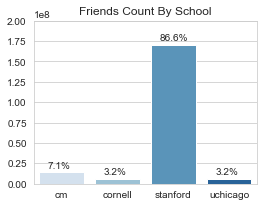

In [391]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').user_friends_count.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+.5e7, ''.join([str(np.round((z[i]/tvars.user_friends_count.sum())*100,1)), '%']))
plt.ylim(0, 2e8)
plt.title('Friends Count By School')
plt.show();

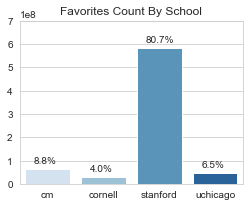

In [390]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').user_favorites_count.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+.25e8, ''.join([str(np.round((z[i]/tvars.user_favorites_count.sum())*100,1)), '%']))
plt.ylim(0, 7e8)
plt.title('Favorites Count By School')
plt.show();

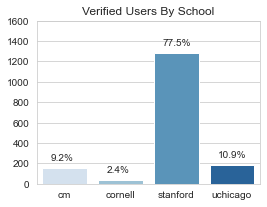

In [389]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').user_verified.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+75, ''.join([str(np.round((z[i]/tvars.user_verified.sum())*100,1)), '%']))
plt.ylim(0, 1600)
plt.title('Verified Users By School')
plt.show();

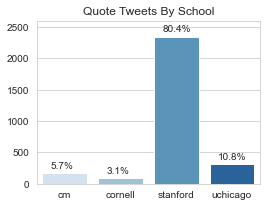

In [388]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').is_quote.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+75, ''.join([str(np.round((z[i]/tvars.is_quote.sum())*100,1)), '%']))
plt.ylim(0, 2600)
plt.title('Quote Tweets By School')
plt.show();

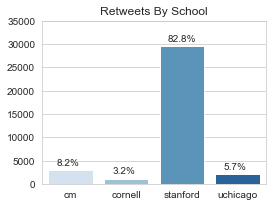

In [387]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').is_retweet.sum().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+1000, ''.join([str(np.round((z[i]/tvars.is_retweet.sum())*100,1)), '%']))
plt.ylim(0, 35000)
plt.title('Retweets By School')
plt.show();

In [379]:
is_retweet = tvars.groupby('school').is_retweet.sum().round()
is_retweet.index.name=''
is_retweet


cm           2942.0
cornell      1137.0
stanford    29624.0
uchicago     2054.0
Name: is_retweet, dtype: float64

In [377]:
is_quote = tvars.groupby('school').is_quote.sum().round()
is_quote.index.name=''
is_quote


cm           166.0
cornell       90.0
stanford    2347.0
uchicago     315.0
Name: is_quote, dtype: float64

In [383]:
pcnt_quote_retweet = (is_quote+is_retweet)/tvars.groupby('school').tweet_id.count()

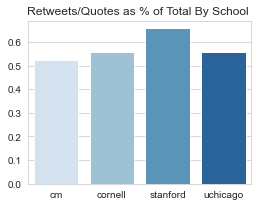

In [386]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = pcnt_quote_retweet.index, 
                   y = pcnt_quote_retweet.values, palette='Blues')

plt.title('Retweets/Quotes as % of Total By School ')
plt.show();

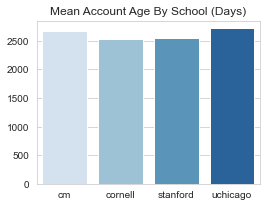

In [394]:
plt.figure(figsize=(4,3))
z = tvars.groupby('school').account_age.mean().round()
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )

plt.title('Mean Account Age By School (Days)')
plt.show(plot);

In [502]:
z.tweet_id.values

array([ 4129,  1678, 27401,  2469], dtype=int64)

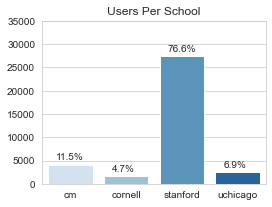

In [503]:
plt.figure(figsize=(4,3))
z = pd.DataFrame(tvars.groupby(['school', 'user_id']).tweet_id.count())
z = z.unstack(0).count().unstack(0)
z.index.name=None
z = z.tweet_id
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )
for i in range(len(z)):
    plot.text(i-.25, z[i]+1000, ''.join([str(np.round((z[i]/tvars.is_retweet.sum())*100,1)), '%']))
plt.ylim(0, 35000)
plt.title('Users Per School')
plt.show(plot);

,tweet_id
cm,4129
cornell,1678
stanford,27401
uchicago,2469


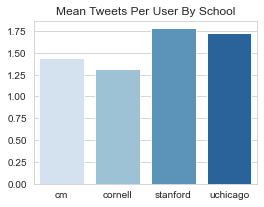

In [484]:
z = pd.DataFrame(tvars.groupby(['school', 'user_id']).tweet_id.count())
z=pd.DataFrame(tvars.groupby('school').count().tweet_id)/z.unstack(0).count().unstack(0)
z.index.name = None

plt.figure(figsize=(4,3))
plot = sns.barplot(x = z.index, y = z.values.flatten(), palette='Blues')
plt.title('Mean Tweets Per User By School')
plt.show(plot);

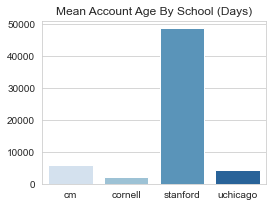

In [440]:
plt.figure(figsize=(4,3))
z.index.name=''
plot = sns.barplot(x = z.index, y = z.values, palette='Blues', )

plt.title('Mean Account Age By School (Days)')
plt.show(plot);

In [441]:
z


cm           5941
cornell      2200
stanford    48686
uchicago     4264
Name: user_id, dtype: int64

**Tweet Timelines**

In [305]:
tvars['tweet_dt'] = tvars.tweet_dt.apply(lambda x: x.date)

In [396]:
z = tvars.loc[:, ['tweet_id','tweet_dt','school']].groupby(['tweet_dt', 'school']).count().unstack('school').fillna(0)
z.index.name = None
z.columns = [c[1] for c in z.columns.to_flat_index()]
z.head()

,cm,cornell,stanford,uchicago
2017-06-22,0.0,1.0,12.0,0.0
2017-06-23,0.0,75.0,15.0,1.0
2017-06-24,0.0,10.0,19.0,0.0
2017-06-25,1.0,7.0,20.0,0.0
2017-06-26,0.0,44.0,39.0,1.0


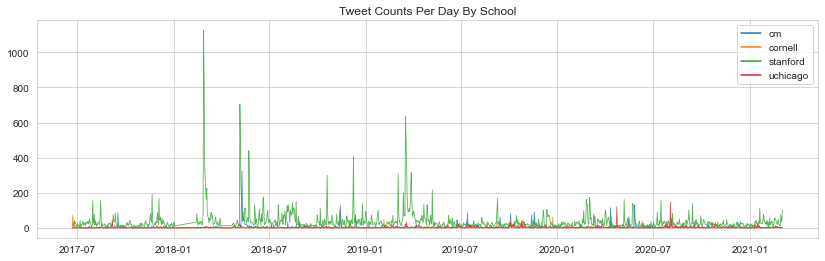

In [397]:
plt.figure(figsize=(14,4))
sns.lineplot(data=z, dashes=None, alpha=.8, linewidth=.8)
plt.title('Tweet Counts Per Day By School');

In [404]:
tweet_growth = z.cumsum()/z.sum()

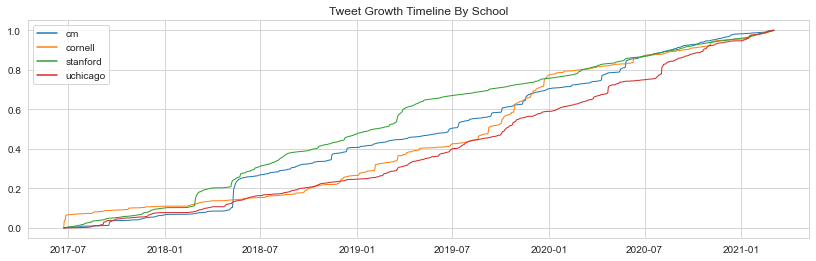

In [407]:
plt.figure(figsize=(14,4))
sns.lineplot(data=tweet_growth, dashes=None, alpha=1, linewidth=1)
plt.title('Tweet Growth Timeline By School');

In [549]:
cm_users = list(map(int, tvars.loc[tvars.school=='cm', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].index))

cm_users

[60258204, 1257170815881228288, 13584132, 756040164149977088, 3149729430]

In [884]:
cm_top_counts = pd.DataFrame(tvars.loc[tvars.school=='cm', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].tweet_id, index=cm_users)

In [887]:
cm_top_counts

,tweet_id
60258204,69
1257170815881228288,61
13584132,47
756040164149977088,42
3149729430,36


In [891]:
pd.DataFrame(data = list(cm_top_counts.index), columns=['Carnegie Mellon User_ID'], index=np.arange(1,6))

,Carnegie Mellon User_ID
1,60258204
2,1257170815881228288
3,13584132
4,756040164149977088
5,3149729430


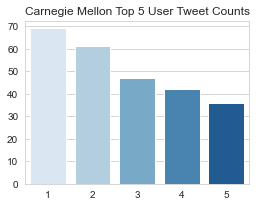

In [522]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cm_top_counts.values.flatten(), palette='Blues')
plt.title('Carnegie Mellon Top 5 User Tweet Counts')
plt.show(plot);

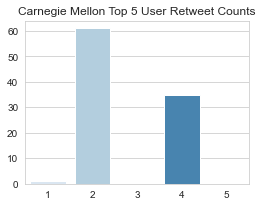

In [578]:
cm_top_counts = pd.DataFrame(data=tvars.loc[(tvars.school=='cm') & (tvars.is_retweet), 
                                       ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).tweet_id, index=cm_users)

plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cm_top_counts.values.flatten(), palette='Blues')
plt.title('Carnegie Mellon Top 5 User Retweet Counts')
plt.show(plot);

In [427]:
cornell_users = list(map(int, tvars.loc[tvars.school=='cornell', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].index))

cornell_users

[3149729430, 1257170815881228288, 1001229541585686528, 3243551873, 614974325]

In [892]:
cornell_top_counts = pd.DataFrame(tvars.loc[tvars.school=='cornell', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].tweet_id, index=cornell_users)

In [894]:
pd.DataFrame(data = list(cornell_top_counts.index), columns=['Cornell User_ID'], index=np.arange(1,6))

,Cornell User_ID
1,3149729430
2,1257170815881228288
3,1001229541585686528
4,3243551873
5,614974325


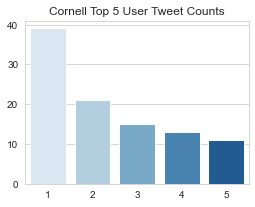

In [523]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cornell_top_counts.values.flatten(), palette='Blues')
plt.title('Cornell Top 5 User Tweet Counts')
plt.show(plot);

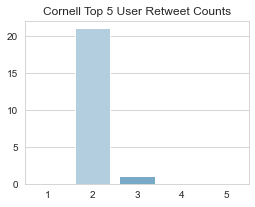

In [579]:
cornell_top_counts = pd.DataFrame(data=tvars.loc[(tvars.school=='cornell') & (tvars.is_retweet), 
                                       ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).tweet_id, index=cornell_users)

plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cornell_top_counts.values.flatten(), palette='Blues')
plt.title('Cornell Top 5 User Retweet Counts')
plt.show(plot);

In [429]:
stanford_users = list(map(int, tvars.loc[tvars.school=='stanford', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].index))

stanford_users

[4074372137,
 841437061,
 844456269222232064,
 844458707178139648,
 718175074537177088]

In [895]:
stanford_top_counts = pd.DataFrame(tvars.loc[tvars.school=='stanford', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].tweet_id, index=stanford_users)

In [896]:
pd.DataFrame(data = list(stanford_top_counts.index), columns=['stanford User_ID'], index=np.arange(1,6))

,stanford User_ID
1,4074372137
2,841437061
3,844456269222232064
4,844458707178139648
5,718175074537177088


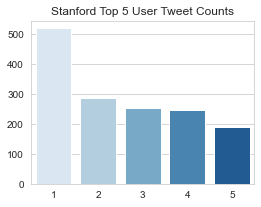

In [524]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = stanford_top_counts.values.flatten(), palette='Blues')
plt.title('Stanford Top 5 User Tweet Counts')
plt.show(plot);

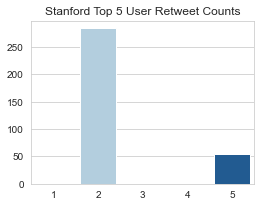

In [580]:
stanford_top_counts = pd.DataFrame(data=tvars.loc[(tvars.school=='stanford') & (tvars.is_retweet), 
                                       ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).tweet_id, index=stanford_users)

plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = stanford_top_counts.values.flatten(), palette='Blues')
plt.title('Stanford Top 5 User Retweet Counts')
plt.show(plot);

In [430]:
uchicago_users = list(map(int, tvars.loc[tvars.school=='uchicago', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].index))

uchicago_users

[969234723619966976,
 772170180,
 24698230,
 741636827178799104,
 929740814657441792]

In [897]:
uchicago_top_counts = pd.DataFrame(tvars.loc[tvars.school=='uchicago', ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).iloc[0:5].tweet_id, index=uchicago_users)

In [899]:
pd.DataFrame(data = list(uchicago_top_counts.index), columns=['UChicago User_ID'], index=np.arange(1,6))

,UChicago User_ID
1,969234723619966976
2,772170180
3,24698230
4,741636827178799104
5,929740814657441792


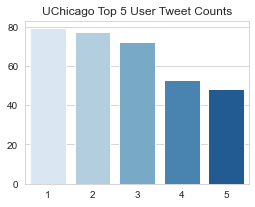

In [525]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = uchicago_top_counts.values.flatten(), palette='Blues')
plt.title('UChicago Top 5 User Tweet Counts')
plt.show(plot);

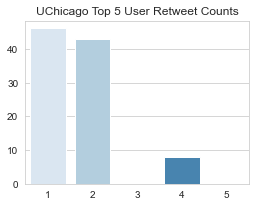

In [581]:
uchicago_top_counts = pd.DataFrame(data=tvars.loc[(tvars.school=='uchicago') & (tvars.is_retweet), 
                                       ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).tweet_id, index=uchicago_users)

plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = uchicago_top_counts.values.flatten(), palette='Blues')
plt.title('UChicago Top 5 User Retweet Counts')
plt.show(plot);

In [437]:
top_users = {'cm':cm_users, 'cornell':cornell_users, 'stanford':stanford_users, 'uchicago':uchicago_users}

In [439]:
pd.to_pickle(top_users, './Data/top_users.pkl')

In [590]:
top_users = [j for i in list(top_users.values()) for j in i]

In [600]:
pd.DataFrame(tvars.loc[tvars.school=='cm', 'user_location'].value_counts())[0:20]

,user_location
0,1338
"Pittsburgh, PA",265
United States,87
"New York, NY",81
"New Delhi, India",72
poland,69
India,66
"San Francisco, CA",54
"Washington, DC",53
Global,51


In [783]:
cm_locs = ['pittsburgh', 'new york', 'san francisco', 'washington', 'boston']
cm_loc_counts = {}
for loc in cm_locs:
    cm_loc_counts[loc] = tvars.loc[tvars.school=='cm', 'user_location'].apply(
        lambda x: True if re.search(loc, str(x).lower()) else False).sum()

cm_loc_counts = pd.DataFrame.from_dict(cm_loc_counts, orient='index', columns=['count'])
cm_loc_counts

,count
pittsburgh,333
new york,145
san francisco,104
washington,76
boston,49


In [784]:
cm_coords = pd.DataFrame(data=[
                        [40.440624, -79.995888],
                        [40.712776, -74.005974],
                        [37.774929, -122.419418],
                        [38.907192, -77.036873],
                        [42.360081, -71.058884]], columns=['lat','long'], index = cm_loc_counts.index)
cm_loc_counts = cm_loc_counts.join(cm_coords)
cm_loc_counts

,count,lat,long
pittsburgh,333,40.440624,-79.995888
new york,145,40.712776,-74.005974
san francisco,104,37.774929,-122.419418
washington,76,38.907192,-77.036873
boston,49,42.360081,-71.058884


In [785]:
pd.DataFrame(tvars.loc[tvars.school=='cornell', 'user_location'].value_counts())[0:20]

,user_location
0,617
"New York, USA",32
United States,27
London,26
"New York, NY",26
India,24
"Ithaca, NY",24
"London, England",22
"New Delhi, India",15
Singapore,15


In [786]:
cornell_locs = ['new york', 'ithaca','boston','los angeles', 'san francisco']
cornell_loc_counts = {}
for loc in cornell_locs:
    cornell_loc_counts[loc] = tvars.loc[tvars.school=='cornell', 'user_location'].apply(
        lambda x: True if re.search(loc, str(x).lower()) else False).sum()

cornell_loc_counts = pd.DataFrame.from_dict(cornell_loc_counts, orient='index', columns=['count'])
cornell_loc_counts

,count
new york,82
ithaca,48
boston,17
los angeles,22
san francisco,15


In [787]:
cornell_coords = pd.DataFrame(data=[
                        [40.712776, -74.005974],
                        [42.440498, -76.495697],
                        [42.360081, -71.058884],
                        [34.052235, -118.243683],
                        [37.774929, -122.419418]], columns=['lat','long'], index = cornell_loc_counts.index)
cornell_loc_counts = cornell_loc_counts.join(cornell_coords)
cornell_loc_counts

,count,lat,long
new york,82,40.712776,-74.005974
ithaca,48,42.440498,-76.495697
boston,17,42.360081,-71.058884
los angeles,22,34.052235,-118.243683
san francisco,15,37.774929,-122.419418


In [788]:
pd.DataFrame(tvars.loc[tvars.school=='stanford', 'user_location'].value_counts())[0:20]

,user_location
0,11534
"Stanford, CA",872
"San Francisco, CA",778
United States,672
"London, England",493
"Palo Alto, CA",466
"New York, NY",466
India,455
Global,414
"Boston, MA",329


In [789]:
stanford_locs = ['stanford', 'san francisco','palo alto','new york', 'boston']
stanford_loc_counts = {}
for loc in stanford_locs:
    stanford_loc_counts[loc] = tvars.loc[tvars.school=='stanford', 'user_location'].apply(
        lambda x: True if re.search(loc, str(x).lower()) else False).sum()

stanford_loc_counts = pd.DataFrame.from_dict(stanford_loc_counts, orient='index', columns=['count'])
stanford_loc_counts

,count
stanford,1238
san francisco,1263
palo alto,596
new york,1070
boston,480


In [790]:
stanford_coords = pd.DataFrame(data=[
                        [37.424107, -122.1660774],
                        [37.774929, -122.419418],
                        [37.445099, -122.160362],
                        [40.712776, -74.005974],
                        [42.360081, -71.058884]], columns=['lat','long'], index = stanford_loc_counts.index)
stanford_loc_counts = stanford_loc_counts.join(stanford_coords)
stanford_loc_counts

,count,lat,long
stanford,1238,37.424107,-122.166077
san francisco,1263,37.774929,-122.419418
palo alto,596,37.445099,-122.160362
new york,1070,40.712776,-74.005974
boston,480,42.360081,-71.058884


In [791]:
pd.DataFrame(tvars.loc[tvars.school=='uchicago', 'user_location'].value_counts())[0:20]

,user_location
0,762
"Chicago, IL",654
Chicago,150
"Chicago, Illinois",100
United States,85
"Los Angeles, CA",57
United Kingdom,52
"New York, NY",46
Mongolia,46
"Washington, DC",36


In [792]:
uchicago_locs = ['chicago', 'los angeles','new york','washington', 'boston']
uchicago_loc_counts = {}
for loc in uchicago_locs:
    uchicago_loc_counts[loc] = tvars.loc[tvars.school=='uchicago', 'user_location'].apply(
        lambda x: True if re.search(loc, str(x).lower()) else False).sum()

uchicago_loc_counts = pd.DataFrame.from_dict(uchicago_loc_counts, orient='index', columns=['count'])
uchicago_loc_counts

,count
chicago,1025
los angeles,65
new york,82
washington,90
boston,42


In [793]:
uchicago_coords = pd.DataFrame(data=[
                        [41.878113, -87.629799],
                        [34.052235, -118.243683],
                        [40.712776, -74.005974],
                        [38.907192, -77.036873],
                        [42.360081, -71.058884]], columns=['lat','long'], index = uchicago_loc_counts.index)
uchicago_loc_counts = uchicago_loc_counts.join(uchicago_coords)
uchicago_loc_counts

,count,lat,long
chicago,1025,41.878113,-87.629799
los angeles,65,34.052235,-118.243683
new york,82,40.712776,-74.005974
washington,90,38.907192,-77.036873
boston,42,42.360081,-71.058884


In [794]:
import cartopy.crs as crs
import cartopy.feature as cfeature

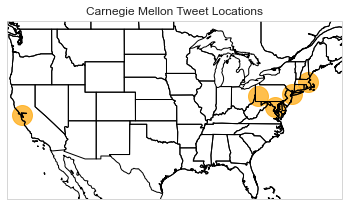

In [799]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent([-125, -65, 25, 50], crs=crs.PlateCarree())

plt.scatter(x=cm_loc_counts['long'], 
            y=cm_loc_counts['lat'],
            transform=crs.PlateCarree(),
            c='orange', s=400, alpha=.7)
plt.title('Carnegie Mellon Tweet Locations')
plt.show()


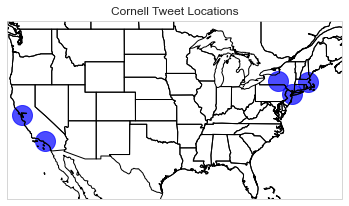

In [802]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent([-125, -65, 25, 50], crs=crs.PlateCarree())

plt.scatter(x=cornell_loc_counts['long'], 
            y=cornell_loc_counts['lat'],
            transform=crs.PlateCarree(),
            c='blue', s=400, alpha=.7)
plt.title('Cornell Tweet Locations')
plt.show()

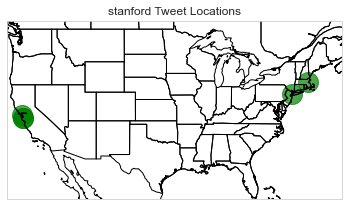

In [803]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent([-125, -65, 25, 50], crs=crs.PlateCarree())

plt.scatter(x=stanford_loc_counts['long'], 
            y=stanford_loc_counts['lat'],
            transform=crs.PlateCarree(),
            c='green', s=400, alpha=.7)
plt.title('Stanford Tweet Locations')
plt.show()

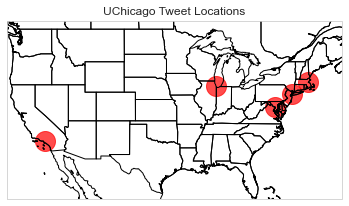

In [804]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent([-125, -65, 25, 50], crs=crs.PlateCarree())

plt.scatter(x=uchicago_loc_counts['long'], 
            y=uchicago_loc_counts['lat'],
            transform=crs.PlateCarree(),
            c='red', s=400, alpha=.7)
plt.title('UChicago Tweet Locations')
plt.show()

In [866]:
top_users_nonuni = {}
for i in [c for c in os.listdir('./Data/top_users_nonuni') if c.split('.')[-1]=='csv']:
    z = list(pd.read_csv(f'./Data/top_users_nonuni/{i}').columns)
    top_users_nonuni[int(z[0])] = int(z[1])

top_users_nonuni = pd.DataFrame.from_dict(top_users_nonuni, orient='index', columns=['non_uni_tweets'])

In [871]:
cm_nonuni = cm_top_counts.join(top_users_nonuni)
cm_nonuni

,tweet_id,non_uni_tweets
60258204,1.0,NaN
1257170815881228288,61.0,NaN
13584132,NaN,891.0
756040164149977088,35.0,NaN
3149729430,NaN,40693.0


In [873]:
cornell_nonuni = cornell_top_counts.join(top_users_nonuni)
cornell_nonuni

,tweet_id,non_uni_tweets
3149729430,NaN,40693.0
1257170815881228288,21.0,NaN
1001229541585686528,1.0,NaN
3243551873,NaN,3199.0
614974325,NaN,5242.0


In [874]:
stanford_nonuni = stanford_top_counts.join(top_users_nonuni)
stanford_nonuni

,tweet_id,non_uni_tweets
4074372137,NaN,423.0
841437061,284.0,610.0
844456269222232064,NaN,NaN
844458707178139648,NaN,NaN
718175074537177088,55.0,145.0


In [875]:
uchicago_nonuni = uchicago_top_counts.join(top_users_nonuni)
uchicago_nonuni

,tweet_id,non_uni_tweets
969234723619966976,46.0,NaN
772170180,43.0,173.0
24698230,NaN,3716.0
741636827178799104,8.0,NaN
929740814657441792,NaN,4884.0


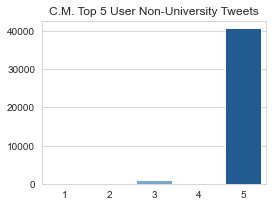

In [879]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cm_nonuni.non_uni_tweets.values, palette='Blues')
plt.title('C.M. Top 5 User Non-University Tweets')
plt.show(plot);

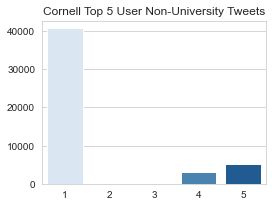

In [880]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cornell_nonuni.non_uni_tweets.values, palette='Blues')
plt.title('Cornell Top 5 User Non-University Tweets')
plt.show(plot);

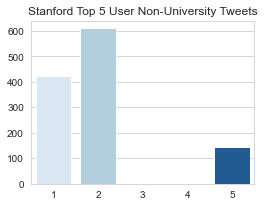

In [881]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = stanford_nonuni.non_uni_tweets.values, palette='Blues')
plt.title('Stanford Top 5 User Non-University Tweets')
plt.show(plot);

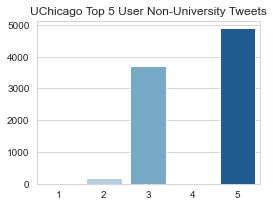

In [883]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = uchicago_nonuni.non_uni_tweets.values, palette='Blues')
plt.title('UChicago Top 5 User Non-University Tweets')
plt.show(plot);

In [ ]:
plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = cm_nonuni.non_uni_tweets.values, palette='Blues')
plt.title('C.M. Top 5 User Non-University Tweets')
plt.show(plot);

In [ ]:
uchicago_top_counts = pd.DataFrame(data=tvars.loc[(tvars.school=='uchicago') & (tvars.is_retweet), 
                                       ['user_id', 'tweet_id']].groupby('user_id')\
    .count().sort_values('tweet_id',ascending=False).tweet_id, index=uchicago_users)

plt.figure(figsize=(4,3))
plot = sns.barplot(x = [1,2,3,4,5], y = uchicago_top_counts.values.flatten(), palette='Blues')
plt.title('UChicago Top 5 User Retweet Counts')
plt.show(plot);